In [42]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D
from keras.layers import MaxPool2D #池化层;下采样,最大值
import tensorflow as tf

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from keras.datasets import fashion_mnist

In [37]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [17]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
y_train.shape,y_test.shape

((60000,), (10000,))

Text(0.5, 1.0, 'this is 0')

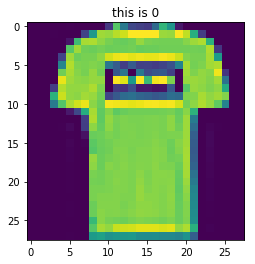

In [26]:
plt.imshow(x_train[1])
plt.title('this is ' + str(y_train[1]))

In [28]:
y_train[1] # T-shit

0

In [38]:
x_train = np.expand_dims(x_train,-1) # 拓展维度

In [39]:
x_train.shape # 图像宽,高, 通道数(rgb)

(60000, 28, 28, 1)

In [41]:
x_test = np.expand_dims(x_test,-1)
x_test.shape

(10000, 28, 28, 1)

In [43]:
model = keras.Sequential()

In [44]:
model.add(Conv2D(32,(3,3),input_shape=x_test.shape[1:],activation='relu'))

In [45]:
model.add(MaxPool2D()) # 28*28 -> 14*14

In [46]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 9,898
Trainable params: 9,898
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.output_shape

(None, 10)

In [49]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [50]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 44s 740us/step - loss: 0.9113 - acc: 0.7194 - val_loss: 0.5960 - val_acc: 0.7923
Epoch 2/30
60000/60000 [==============================] - 43s 718us/step - loss: 0.5330 - acc: 0.8164 - val_loss: 0.5658 - val_acc: 0.8005
Epoch 3/30
60000/60000 [==============================] - 43s 714us/step - loss: 0.4777 - acc: 0.8345 - val_loss: 0.5025 - val_acc: 0.8284
Epoch 4/30
60000/60000 [==============================] - 43s 713us/step - loss: 0.4374 - acc: 0.8473 - val_loss: 0.4522 - val_acc: 0.8435
Epoch 5/30
60000/60000 [==============================] - 42s 708us/step - loss: 0.4086 - acc: 0.8577 - val_loss: 0.4510 - val_acc: 0.8381
Epoch 6/30
60000/60000 [==============================] - 43s 715us/step - loss: 0.3874 - acc: 0.8638 - val_loss: 0.4087 - val_acc: 0.8564
Epoch 7/30
60000/60000 [==============================] - 43s 711us/step - loss: 0.3695 - acc: 0.8688 - val_loss: 0.

In [51]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

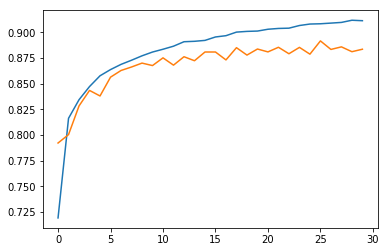

In [54]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')